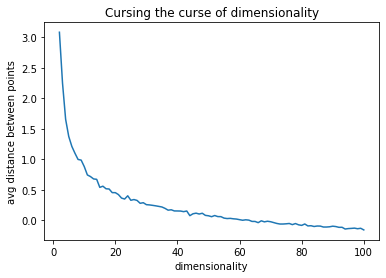

In [7]:
# Author: Eduardo Bezerra (ebezerra@cefet-rj.br)
# Title: Cursing the Curse of Dimensionality

import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import math

def compute_diffs(k, data_points):
  dists = pairwise_distances(data_points)
  min_dist = np.amin(dists[np.nonzero(dists)])
  max_dist = np.amax(dists)
  return math.log10((max_dist - min_dist) / min_dist)

'''
  Generate 100 synthetic datasets with increasing dimensionality. For each one 
  of them, compute the average distance between max and min distances between 
  any pair of points (distanted are put log space for scaling purposes). 
  This procedure is repeated for a number of runs, and the average results 
  are computed.

  Plots these average distances against the corresponding dimensionalities.

  The resulting plot shows a counterintuitive aspect related to the curse 
  of dimensionality: as the dimensionality of the dataset increases, the 
  distances (or similarities) between points in the dataset become more uniform, 
  which in turn makes it increasingly hard to discriminate between these points.
'''
def main():
  n_points = 500
  n_runs = 5
  n_dims = 100

  mean_diffs = {}
  for k in range(2, n_dims + 1):
      diffs = np.zeros(n_runs)
      for i in range(0, n_runs):
        data_points = np.random.random((n_points, k))
        diffs[i] = compute_diffs(k, data_points)
      mean_diffs[k] = np.mean(diffs)

  keys = np.fromiter(mean_diffs.keys(), dtype=float)
  vals = np.fromiter(mean_diffs.values(), dtype=float)
  plt.plot(keys, vals)
  plt.title('Cursing the curse of dimensionality')
  plt.xlabel('dimensionality')
  plt.ylabel('avg distance between points')
  plt.show()

if __name__ == "__main__":
    main()